<a href="https://colab.research.google.com/github/Almale44/Diplomado-/blob/main/PresentationSpotify2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import geopandas as gpd
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud, STOPWORDS
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

TOP HIT SPOTIFY

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Diplomado/songs_normalize.csv')
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


# Data analisis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64




*   artist: Name of the Artist.
* song: Name of the Track.
duration_ms: Duration of the track in milliseconds.
* explicit: The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.
* year: Release Year of the track.
* popularity: The higher the value the more popular the song is.
* danceability: Danceability describes how suitable a * track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
* key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
* loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
* mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* genre: Genre of the track.




In [4]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


1. Are there songs with the same popularity? Yes

In [5]:
df['popularity'].value_counts()

popularity
0     126
69     76
68     75
73     69
74     69
     ... 
88      1
89      1
87      1
8       1
7       1
Name: count, Length: 76, dtype: int64

The least popular songs are:

In [6]:
df_least=df[(df['popularity']==0)]
df_least

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
59,Oasis,Go Let It Out,278666,False,2000,0,0.408,0.849,2,-5.631,1,0.0333,0.01360,0.000025,0.5600,0.628,84.192,"Folk/Acoustic, rock"
62,Mariah Carey,Against All Odds (Take A Look at Me Now) (feat...,199480,False,2011,0,0.471,0.514,1,-5.599,1,0.0315,0.58400,0.000000,0.1030,0.373,117.338,"pop, R&B"
126,Jennifer Lopez,Ain't It Funny,246160,False,2001,0,0.707,0.869,5,-4.525,0,0.0481,0.10400,0.000121,0.0813,0.621,99.825,"hip hop, pop, R&B"
175,DB Boulevard,Point Of View - Radio Edit,231166,False,2018,0,0.676,0.715,6,-6.854,1,0.0287,0.00284,0.074600,0.0685,0.275,129.006,Dance/Electronic
182,Musiq Soulchild,Love,304666,False,2000,0,0.569,0.385,1,-9.919,0,0.0499,0.34200,0.000000,0.0876,0.339,99.738,"pop, R&B"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,CNCO,Reggaetón Lento (Remix),188786,False,2017,0,0.623,0.909,4,-3.079,0,0.0758,0.15800,0.000000,0.0972,0.651,93.984,"pop, latin"
1794,Shawn Mendes,Mercy,208733,False,2017,0,0.561,0.674,4,-4.882,0,0.0818,0.11800,0.000000,0.1110,0.383,148.127,pop
1850,Loud Luxury,Body (feat. brando),163216,False,2017,0,0.752,0.764,1,-4.399,1,0.0380,0.04760,0.000094,0.0543,0.582,121.958,"pop, Dance/Electronic"
1913,NLE Choppa,Shotta Flow (feat. Blueface) [Remix],176631,True,2019,0,0.894,0.511,2,-4.768,1,0.4200,0.02510,0.000000,0.1400,0.568,120.080,hip hop


In [7]:
df_least.shape

(126, 18)

We could find at least 126

Which artists could we find?

In [8]:
df['artist'].unique()

array(['Britney Spears', 'blink-182', 'Faith Hill', 'Bon Jovi', '*NSYNC',
       'Sisqo', 'Eminem', 'Robbie Williams', "Destiny's Child", 'Modjo',
       "Gigi D'Agostino", 'Eiffel 65', "Bomfunk MC's", 'Sting',
       'Melanie C', 'Aaliyah', 'Anastacia', 'Alice Deejay', 'Dr. Dre',
       'Linkin Park', 'Tom Jones', 'Sonique', 'M.O.P.', 'Limp Bizkit',
       'Darude', 'Da Brat', 'Moloko', 'Chicane', 'DMX', 'Debelah Morgan',
       'Madonna', 'Ruff Endz', 'Montell Jordan', 'Kylie Minogue', 'JAY-Z',
       'LeAnn Rimes', 'Avant', 'Enrique Iglesias', 'Toni Braxton',
       'Bow Wow', 'Missy Elliott', 'Backstreet Boys', 'Samantha Mumba',
       'Mýa', 'Mary Mary', 'Next', 'Janet Jackson', 'Ricky Martin',
       'Jagged Edge', 'Mariah Carey', 'Baha Men', 'Donell Jones', 'Oasis',
       'DJ Ötzi', 'P!nk', 'Craig David', 'Christina Aguilera',
       'Red Hot Chili Peppers', 'Sammie', 'Santana', 'Kandi', 'Vengaboys',
       'Ronan Keating', 'Madison Avenue', 'Céline Dion', '3 Doors Down',
     

How many artists?

In [9]:
df['artist'].nunique()

835

How many songs does each artist have?

In [10]:
df['artist'].value_counts()

artist
Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    19
                  ..
Sidney Samson      1
Cam’ron            1
Elvis Presley      1
Lucenzo            1
Blanco Brown       1
Name: count, Length: 835, dtype: int64

In [11]:
def format_title(title, subtitle=None, subtitle_font_size=14):
        title = f'<b>{title}</b>'
        if not subtitle:
            return title
        subtitle = f'<span style="font-size: {subtitle_font_size}px;">{subtitle}</span>'
        return f'{title}<br>{subtitle}'
fig=px.bar(df,x='song', y='popularity')
fig.update_layout(
    yaxis_title='Popularity',
    xaxis_title='Song',
    title_text= format_title('Spotify Songs','Proyect'),
    template='plotly_white')
fig

## Analisis of one artist (Tay)

In [12]:
df_tay=df[(df['artist']=='Taylor Swift')]
df_tay

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
905,Taylor Swift,Love Story,236266,False,2008,74,0.617,0.741,2,-3.970,1,0.0311,0.13100,0.000000,0.0772,0.306,118.984,pop
993,Taylor Swift,You Belong With Me,231146,False,2008,55,0.687,0.771,6,-4.424,1,0.0384,0.16400,0.000025,0.1120,0.445,129.964,pop
1093,Taylor Swift,Back To December,293026,False,2010,65,0.529,0.670,2,-4.663,1,0.0303,0.11700,0.000000,0.3340,0.286,141.893,pop
1258,Taylor Swift,I Knew You Were Trouble.,219720,False,2012,59,0.622,0.469,3,-6.798,0,0.0363,0.00454,0.000002,0.0335,0.679,77.019,pop
1343,Taylor Swift,I Knew You Were Trouble.,219720,False,2012,76,0.622,0.469,3,-6.798,0,0.0363,0.00454,0.000002,0.0335,0.679,77.019,pop
1393,Taylor Swift,22,232120,False,2012,68,0.661,0.729,7,-6.561,1,0.0376,0.00215,0.001300,0.0477,0.668,103.987,pop
1421,Taylor Swift,Bad Blood,211933,False,2014,54,0.646,0.794,7,-6.104,1,0.1900,0.08850,0.000006,0.2010,0.287,170.216,pop
1462,Taylor Swift,Style,231000,False,2014,61,0.588,0.791,7,-5.595,1,0.0402,0.00245,0.002580,0.1180,0.487,94.933,pop
1473,Taylor Swift,Shake It Off,219200,False,2014,79,0.647,0.800,7,-5.384,1,0.1650,0.06470,0.000000,0.3340,0.942,160.078,pop
1510,Taylor Swift,Blank Space,231826,False,2014,82,0.760,0.703,5,-5.412,1,0.0540,0.10300,0.000000,0.0913,0.570,95.997,pop


In [13]:
df_tay.song.nunique()

13

In [14]:
fig=px.scatter(df_tay, y='song', x='year', color='popularity')
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Song',
    title_text= format_title('Taylor','Proyect'),
    template='plotly_white')
fig

In [15]:
#int('streams')
df_tay.popularity.max()

82

In [16]:
df_taypop=df_tay[(df_tay['popularity']==82)]
df_taypop

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1510,Taylor Swift,Blank Space,231826,False,2014,82,0.76,0.703,5,-5.412,1,0.054,0.103,0.0,0.0913,0.57,95.997,pop


In [17]:
fig=px.bar(df_tay,x='song', y='popularity')
fig.update_layout(
    yaxis_title='Popularity',
    xaxis_title='Song',
    title_text= format_title('Taylor','Proyecto'),
    template='plotly_white')
fig

## Artists that I couldn't find:

In [18]:
df_yo=df[(df['artist']=='Lasso')]
df_yo

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre


In [19]:
df_ppp=df[(df['artist']=='Peso Pluma')]
df_ppp

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre


In [20]:
df_pg=df[(df['artist']=='Piter G')]
df_pg

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre


## Another Artist (BB)

In [21]:
df_BB=df[(df['artist']=='Bad Bunny')]
df_BB

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1940,Bad Bunny,MIA (feat. Drake),210367,False,2018,77,0.817,0.539,6,-6.349,0,0.0621,0.0141,0.000496,0.099,0.158,97.062,latin
1960,Bad Bunny,Callaita,250533,True,2019,81,0.610,0.624,2,-4.773,1,0.3090,0.6000,0.000002,0.243,0.244,176.169,latin


In [22]:
fig=px.scatter(df_BB, y='song', x='year', color='popularity')
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Song',
    title_text= format_title('Bad Bunny','Proyect'),
    template='plotly_white')
fig

In [23]:
fig=px.bar(df_BB,x='song', y='popularity', color='year')
fig.update_layout(
    yaxis_title='Popularity',
    xaxis_title='Song',
    title_text= format_title('Bad Bunny','Proyect'),
    template='plotly_white')
fig

# REGRESSION

We need to remember:


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


##Separation of type

In [25]:
num = (df.dtypes == float) | (df.dtypes == int)
num.index

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

In [26]:
num_colms = [c for c in num.index if num[c]]
num_colms

['duration_ms',
 'year',
 'popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [27]:
obj = df.dtypes == object
obj_colms = [c for c in obj.index if obj[c]]
obj_colms

['artist', 'song', 'genre']

In [28]:
df_int = df[num_colms]
df_int

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,211160,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053
1,167066,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726
2,250546,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859
3,224493,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992
4,200560,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,181026,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958
1996,178426,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994
1997,200593,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984
1998,171029,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998


In [29]:
df_int.corr()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_ms,1.000000,-0.316534,0.050617,-0.060057,-0.078763,-0.002560,-0.079912,-0.003848,0.066998,0.010923,-0.004208,0.024941,-0.116870,-0.028603
year,-0.316534,1.000000,-0.003825,0.033532,-0.108644,0.007380,0.017479,-0.007358,0.001111,0.033809,-0.050265,-0.027037,-0.209365,0.076867
popularity,0.050617,-0.003825,1.000000,-0.003546,-0.014021,0.014823,0.030632,-0.021353,0.021162,0.024619,-0.048059,-0.009856,-0.016142,0.014288
danceability,-0.060057,0.033532,-0.003546,1.000000,-0.104038,0.032731,-0.033315,-0.067528,0.145590,-0.065429,0.023207,-0.126413,0.403178,-0.173418
energy,-0.078763,-0.108644,-0.014021,-0.104038,1.000000,-0.003446,0.651016,-0.040651,-0.057018,-0.445469,0.037861,0.156761,0.334474,0.153719
key,-0.002560,0.007380,0.014823,0.032731,-0.003446,1.000000,-0.007474,-0.153182,0.007147,0.002365,-0.008173,-0.033071,0.036977,-0.001431
loudness,-0.079912,0.017479,0.030632,-0.033315,0.651016,-0.007474,1.000000,-0.028133,-0.076388,-0.310039,-0.104925,0.102159,0.232150,0.080709
mode,-0.003848,-0.007358,-0.021353,-0.067528,-0.040651,-0.153182,-0.028133,1.000000,-0.000077,0.005744,-0.038613,0.025439,-0.074681,0.048434
speechiness,0.066998,0.001111,0.021162,0.145590,-0.057018,0.007147,-0.076388,-0.000077,1.000000,0.000394,-0.062954,0.061172,0.073605,0.057747
acousticness,0.010923,0.033809,0.024619,-0.065429,-0.445469,0.002365,-0.310039,0.005744,0.000394,1.000000,-0.005214,-0.110043,-0.128128,-0.103660


## Correlation Matrix

In [30]:
corr_matrix = df_int.corr()
fig = px.imshow(corr_matrix, x = corr_matrix.columns, y = corr_matrix.columns, color_continuous_scale=px.colors.sequential.Greens,  range_color=[-1,1], text_auto = True, aspect = "auto")
fig.update_layout(title='Correlation matrix of columns')
fig.update(layout_coloraxis_showscale=False)
fig.show()


In [31]:
# checking for null values
df_int.isnull().sum()

duration_ms         0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64

In [32]:
#checking for duplicate values
df_int.duplicated().value_counts()

False    1941
True       59
Name: count, dtype: int64

In [33]:
#dropping the duplicate values
df_int.drop_duplicates(inplace=True)
df.shape

<ipython-input-33-6915fecc22c1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(2000, 18)

In [34]:
corr_matrix = df_int.corr()
fig = px.imshow(corr_matrix, x = corr_matrix.columns, y = corr_matrix.columns, color_continuous_scale=px.colors.sequential.Greens,  range_color=[-1,1], text_auto = True, aspect = "auto")
fig.update_layout(title='Correlation matrix of columns')
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [35]:
fig = px.scatter_matrix(df, dimensions=df_int.columns[:-1], title='Pairwise Scatter Plot', height = 1000, color = 'loudness')
fig.update_traces(diagonal_visible=False)
fig.show()

In [36]:
fig=px.area(df.groupby('year', as_index=False).count().sort_values(by='song', ascending=False).sort_values(by='year'),
            x='year', y='song', markers=True,labels={'song':'Total songs'},
            color_discrete_sequence=['green'],title='Yearly song collections')
fig.update_layout(hovermode='x',title_x=0.5)
fig.update_layout(template='plotly_dark')

In [37]:
fig=px.histogram(df.groupby('genre',as_index=False).count().sort_values(by='song',ascending=False),
                 x='genre',y='song',color_discrete_sequence=['green'],template='plotly_dark',
                 marginal='box',title='<b> Songs based on genres</b>')
fig.update_layout(title_x=0.5)

In [38]:
fig=px.histogram(df.groupby('genre',as_index=False).sum().sort_values(by='popularity',ascending=False),
                 x='genre',y='popularity',color_discrete_sequence=['lightgreen'],
                 template='plotly_dark',marginal='box',title='<b>Popular genres based on pouplarity</b>')
fig.update_layout(title_x=0.5)

In [39]:
px.histogram(df.groupby('artist',as_index=False).count().sort_values(by='song',ascending=False).head(100),
             x='artist',y='song',labels={'song':'Total Songs'},width=1000,color_discrete_sequence=['green'],
             template='plotly_dark',marginal='box',
             title='<b> List of Songs Recorded by Each Singer')

In [40]:
px.box(df,x='explicit',y='popularity',color='explicit',template='plotly_dark',color_discrete_sequence=['cyan','magenta'],title='<b>popularity based on explicit content')

In [68]:
px.scatter(df,y='loudness',x='energy',color='explicit', color_discrete_sequence=['green', 'gold'],
           template='plotly_dark',title='Distribution of Energy VS Loudness')

In [42]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

In [43]:
fig=px.treemap(df,path=[px.Constant('Singer'),'artist','genre','song'],values='popularity',title='<b>TreeMap of Singers Playlist')
fig.update_traces(root_color='lightgreen')
fig.update_layout(title_x=0.5)

# Regression Models

In [44]:
df
df['loudness'] = df.loudness
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [45]:
X = df_int.drop('loudness', axis=1)
y = df_int['loudness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Model

In [46]:
svm = SVR()
svm.fit(X_train_scaled, y_train)

SVR()

###Evaluate Model

In [47]:
y_pred_svm = svm.predict(X_test_scaled)
mse_svm = mean_squared_error(y_test, y_pred_svm)
print(f"SVM MSE: {mse_svm:.2f}")

SVM MSE: 2.52


In [48]:
svm_r2 = r2_score(y_test, y_pred_svm)
print(f"SVM R^2 Score: {svm_r2:.2f}")

SVM R^2 Score: 0.37


####Tune Model

In [49]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf']
}

In [50]:
svm = SVR()
grid_search_svm = GridSearchCV(estimator = svm, param_grid=param_grid_svm, cv=5)
grid_search_svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']})

In [51]:
best_params_svm = grid_search_svm.best_params_
best_params_svm

{'C': 0.1, 'kernel': 'linear'}

In [52]:
best_model_svm = grid_search_svm.best_estimator_
best_model_svm

SVR(C=0.1, kernel='linear')

In [53]:
y_pred_best_svm = best_model_svm.predict(X_test_scaled)
mse_best_svm = mean_squared_error(y_test, y_pred_best_svm)
print(f"SVM MSE: {mse_best_svm:.2f}")

SVM MSE: 2.37


##Decision trees

In [54]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

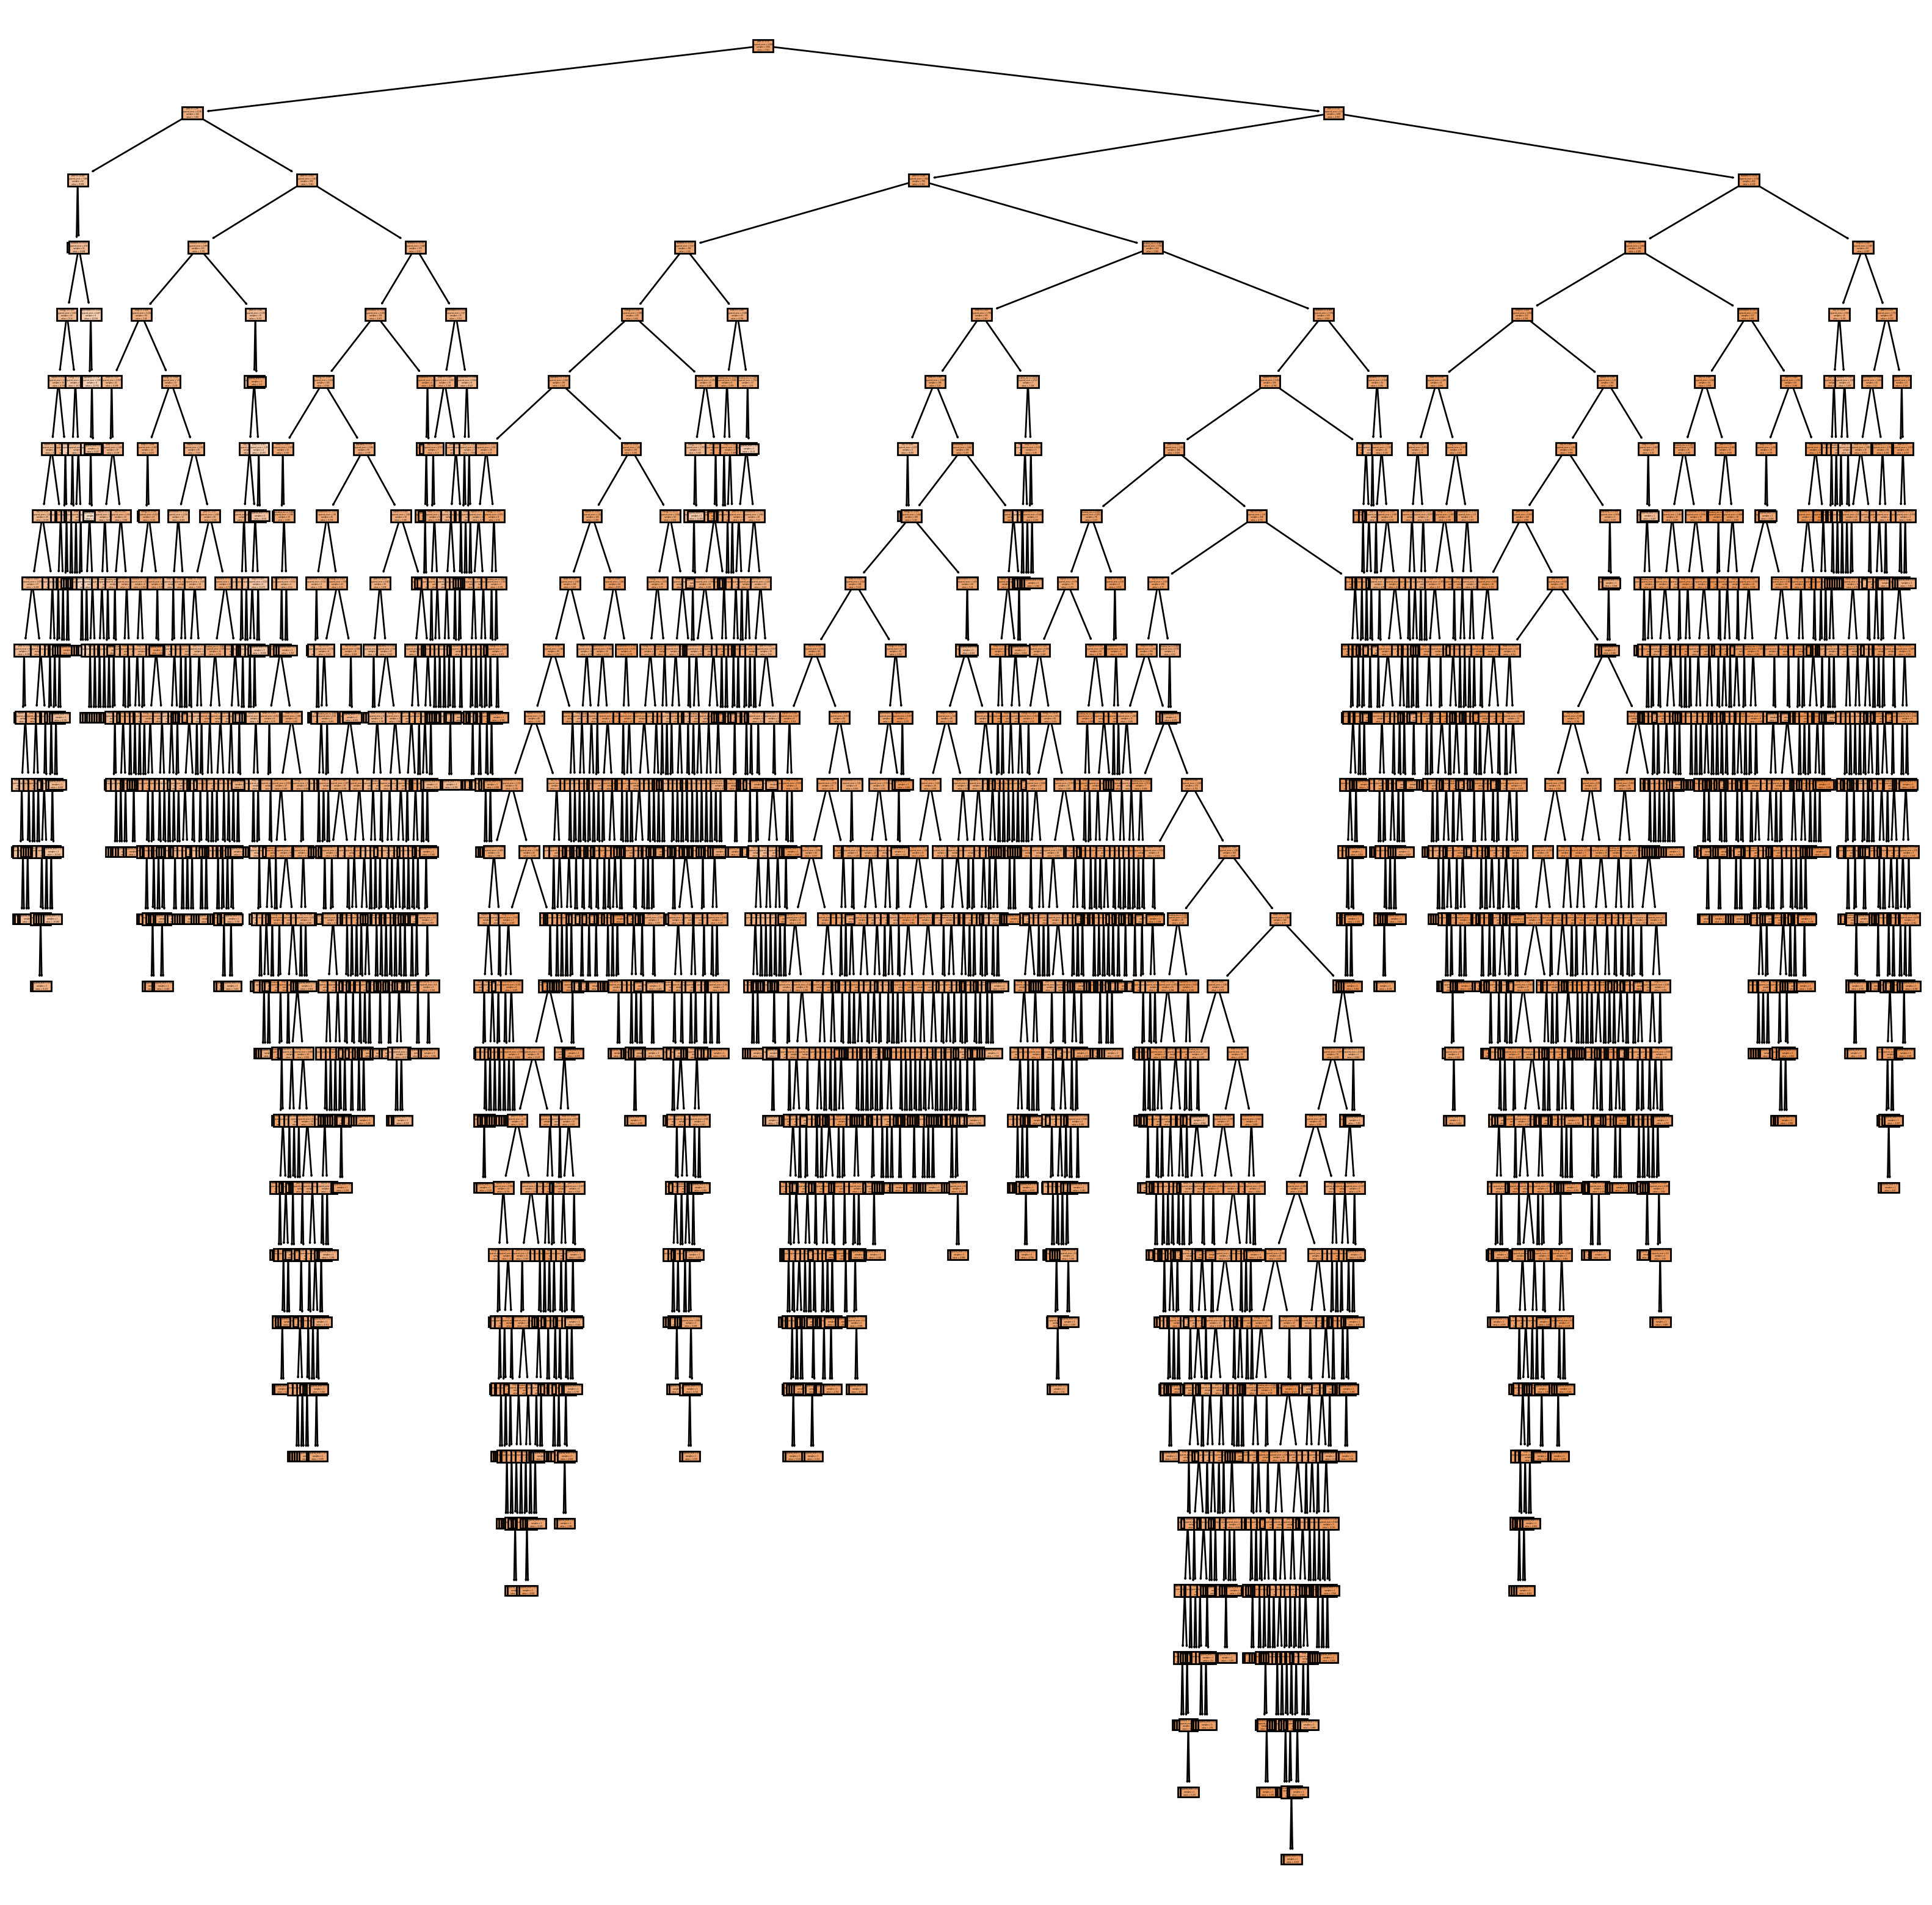

In [55]:
plt.figure(figsize=(20, 20), dpi=200)
plot_tree(dt, feature_names = df.columns[:-1], filled=True)
plt.show()

### Evaluate Model

In [56]:
y_pred_dt = dt.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Trees MSE: {mse_dt:.2f}")

Decision Trees MSE: 3.90


In [57]:
dt_r2 = r2_score(y_test, y_pred_dt)
print(f"DT R^2 Score: {dt_r2:.2f}")

DT R^2 Score: 0.02


### Tune Model

In [58]:
param_grid_dt = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['friedman_mse', 'absolute_error', 'squared_error']}

In [59]:
dt = DecisionTreeRegressor(random_state=42)
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5)
grid_search_dt.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['friedman_mse', 'absolute_error',
                                       'squared_error'],
                         'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10]})

In [60]:
best_params_dt = grid_search_dt.best_params_
best_params_dt

{'criterion': 'absolute_error', 'max_depth': 5, 'min_samples_split': 5}

In [61]:
best_model_dt = grid_search_dt.best_estimator_
best_model_dt

DecisionTreeRegressor(criterion='absolute_error', max_depth=5,
                      min_samples_split=5, random_state=42)

In [62]:
y_pred_best_dt = best_model_dt.predict(X_test_scaled)
mse_best_dt = mean_squared_error(y_test, y_pred_best_dt)
print(f"DT MSE: {mse_best_dt:.2f}")

DT MSE: 2.46


##Random Forest

In [63]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

### Evaluated

In [64]:
y_pred_rf = rf.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf:.2f}")

Random Forest MSE: 2.25


In [65]:
rf_r2 = r2_score(y_test, y_pred_dt)
print(f"RF R^2 Score: {rf_r2:.2f}")

RF R^2 Score: 0.02


### Tune Model

In [66]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['friedman_mse', 'absolute_error', 'squared_error']}

In [67]:
rf = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(X_train_scaled, y_train)
best_params_rf = grid_search_rf.best_params_
best_params_rf

KeyboardInterrupt: 

In [ ]:
best_model_rf = grid_search_rf.best_estimator_
best_model_rf

In [ ]:
y_pred_best_rf = best_model_rf.predict(X_test_scaled)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
print(f"RF MSE: {mse_best_rf:.2f}")

# What's our best model?

In [ ]:
results = pd.DataFrame({
    'Model': ['SVM', 'Decision Tree', 'Random Forest'],
    'MSE': [mse_svm, mse_dt, mse_rf],
    'R^2 Score': [svm_r2, dt_r2, rf_r2]})
results

The lowest MSE is from random forest, where we have our better prediction accuracy

In [ ]:
fig = px.bar(results, x = 'Model', y = ['MSE', 'R^2 Score'],
             barmode = 'group', title = 'Model Comparison',
             labels = {'value': 'Score', 'variable': 'Metric'},
             template = 'plotly_dark', color_discrete_sequence=['green', 'blue'])
fig.show()

In [ ]:
best_results = pd.DataFrame({
    'Model': ['SVM', 'Decision Tree', 'Random Forest'],
    'MSE': [mse_best_svm, mse_best_dt, mse_best_rf]})
    #'R^2 Score': [svm_score, dt_score, rf_score]})
best_results

In [ ]:
fig = px.bar(best_results, x = 'Model', y = ['MSE'],
             barmode = 'group', title = 'Model Comparison',
             labels = {'value': 'Score', 'variable': 'Metric'},
             color_discrete_sequence=['green'],
             template = 'plotly_dark')
fig.show()

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

In [ ]:
models_data = {
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'SVM', 'Naive Bayes', 'Random Forest'],
    'Accuracy': [lr_accuracy, knn_accuracy, svm_accuracy, nb_accuracy, rf_accuracy],
    'Precision': [lr_precision, knn_precision, svm_precision, nb_precision, rf_precision],
    'Recall': [lr_recall, knn_recall, svm_recall, nb_recall, rf_recall],
    'F1-Score': [lr_f1, knn_f1, svm_f1, nb_f1, rf_f1]
}

df_models = pd.DataFrame(models_data)
df_models

In [ ]:
models_data = {
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'SVM', 'Naive Bayes', 'Random Forest'],
    'Accuracy': [lr_accuracy, knn_accuracy, svm_accuracy, nb_accuracy, rf_accuracy],
    'Precision': [lr_precision, knn_precision, svm_precision, nb_precision, rf_precision],
    'Recall': [lr_recall, knn_recall, svm_recall, nb_recall, rf_recall],
    'F1-Score': [lr_f1, knn_f1, svm_f1, nb_f1, rf_f1]
}

df_models = pd.DataFrame(models_data)
df_models

In [ ]:
type('genre')

In [ ]:
df['genre'] = ([[genre].split(",") for genre in df['genre']])
gen = []
for genre in df['genre']:
    gen.extend(genre)
gen = list(set(gen))
gen.sort()
gen_vec = np.zeros(len(gen), dtype = int)
genre = []
for genre in df['genre']:
    gv = np.zeros(len(gen), dtype = int)
    for i in range(len(genre)):
        for j in range(len(gen)):
            if genre[i] == gen[j]:
                gv[j] += 1
                gen_vec[j] += 1
                break
    genre.append(gv)
df['genres_v'] = pd.Series(genre)
df